In [140]:
import cv2 as cv
import sys
import numpy as np
from matplotlib import pyplot as plt
from torchvision import transforms

data = []
trans = transforms.Compose([transforms.ToTensor()])
def split_mask(mask, num_classes):
    # Список для хранения отдельных масок классов
    split_masks = []
    for class_id in range(num_classes):
        # Создаем маску для данного класса
        class_mask = (mask == class_id).astype(np.uint8)  # 1 для пикселей этого класса, 0 для остальных
        split_masks.append(class_mask)
    return split_masks

for _ in range(0, 1):
    image = cv.imread(f"C:/Users/work/FILTERS/renders/{_}.png", cv.THRESH_BINARY)
    assert image is not None, "file could not be read, check with os.path.exists()"
    image = cv.resize(image, (600, 600))
    
    mask = cv.imread(f'C:/Users/work/FILTERS/labels/{_}.png', cv.THRESH_BINARY)
    assert mask is not None, "file could not be read, check with os.path.exists()"
    mask = cv.resize(mask, (600,600))

    X = cv.imread(f"C:/Users/work/FILTERS/renders/{_}.png", cv.THRESH_TOZERO)
    ret,X = cv.threshold(X,127,255,cv.THRESH_TOZERO)
    
    X = cv.resize(X, (600, 600))
    X =  np.asarray([X.transpose(2, 0, 1)[2]])
    
    X = X.transpose(1, 2, 0)
    
    X = trans(X)
    
    ret1,th1 = cv.threshold(image,170,255,cv.THRESH_BINARY)
    ret2,th2 = cv.threshold(mask, 12, 255, cv.THRESH_BINARY) 
    #wire = th1 - th2
    #wire[wire != 255] = 0
    #wire[wire == 255] = 1
    #pool = th2
    #pool[pool != 0] = 2
    #
   #y = np.asarray(split_mask(pool-wire, 3))
   #y[2][y[2] != 0] = 2
    y = th2 - th1
    y[y==1] = 0
    y[y==255] = 1
    th1[th1 == 255] = 2
    y = np.asarray(split_mask(y+th1, 3))
    y[2][y[2] == 1] = 2
    data.append([X, y])
    
    

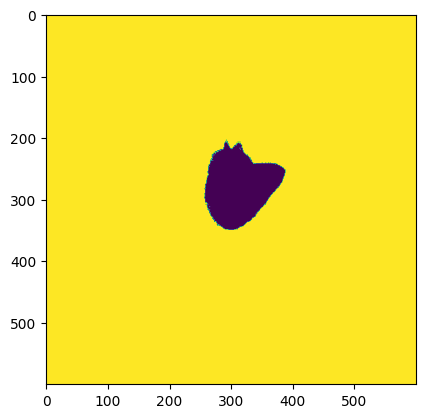

In [144]:
plt.imshow(y[0])

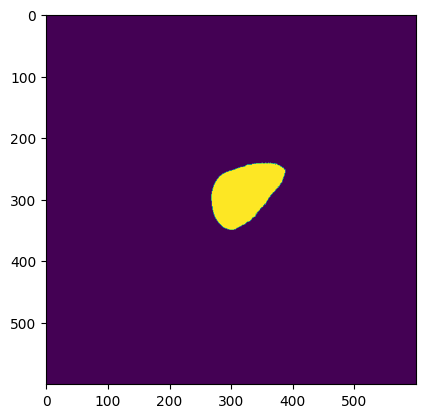

In [86]:
plt.imshow(th2)

In [122]:
x = th2 - th1
x[x==1] = 0
x[x==255] = 1
th1[th1 == 255] = 2

In [141]:
np.unique(y)

array([0, 1, 2], dtype=uint8)

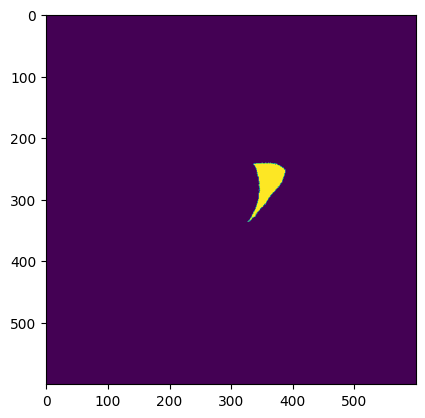

In [131]:
plt.imshow(x)

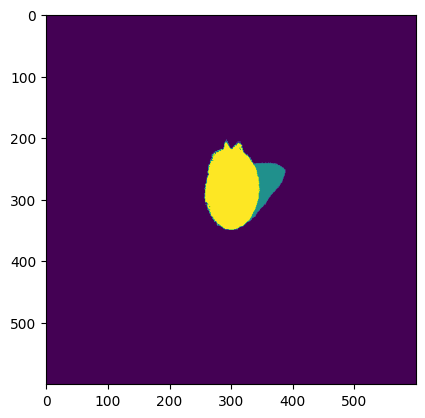

In [124]:
plt.imshow(x+th1)

In [110]:
np.unique(x+th1)

array([  0, 255], dtype=uint8)

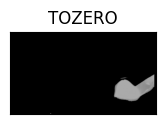

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,120,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
 
titles = ['TOZERO']
images = [thresh4]
 
for i in range(1):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()